<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/04w_A_mon_0331_easy_04_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04주 쉽게 배우는 파이썬 데이터분석

In [63]:
import pandas as pd
import numpy as np

In [64]:
import seaborn as sns

ttn = sns.load_dataset('titanic')
ttn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

In [66]:
%config InlineBackend.figure_format = 'retina'

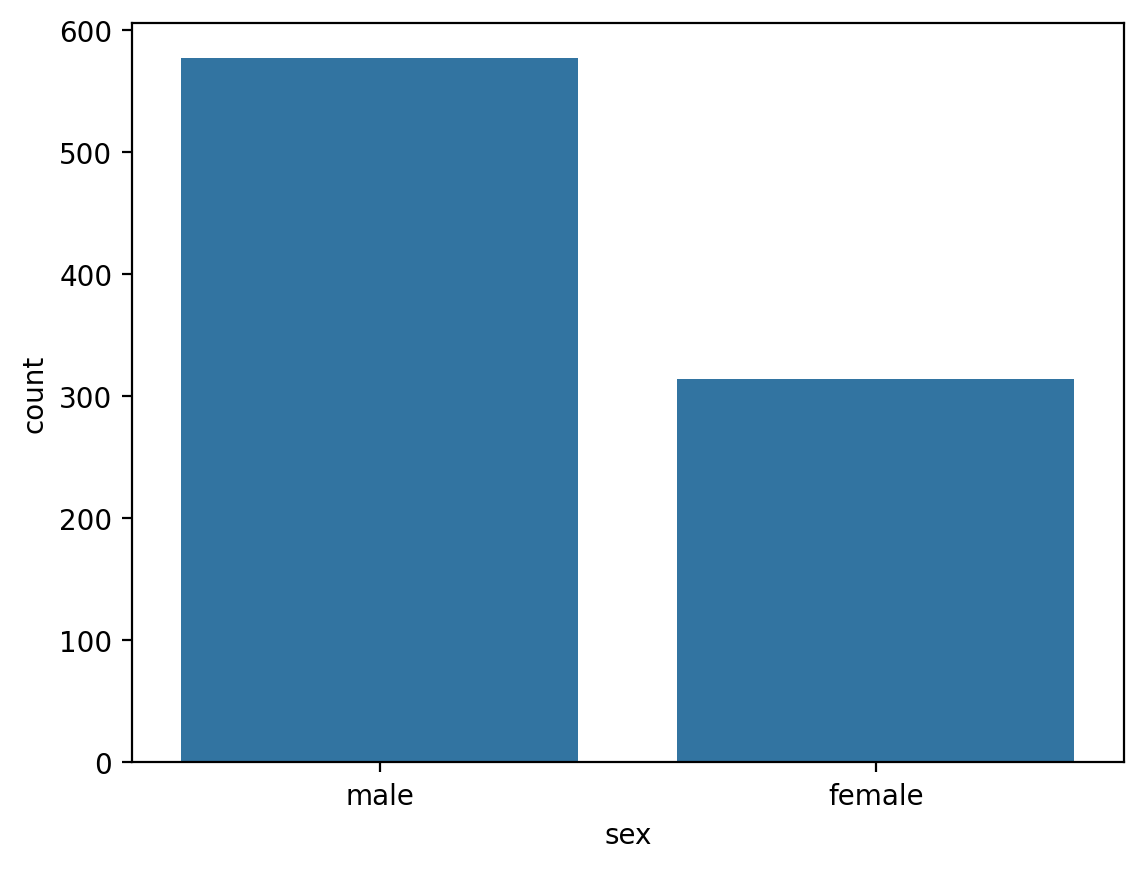

In [67]:
sns.countplot(ttn, x = 'sex');

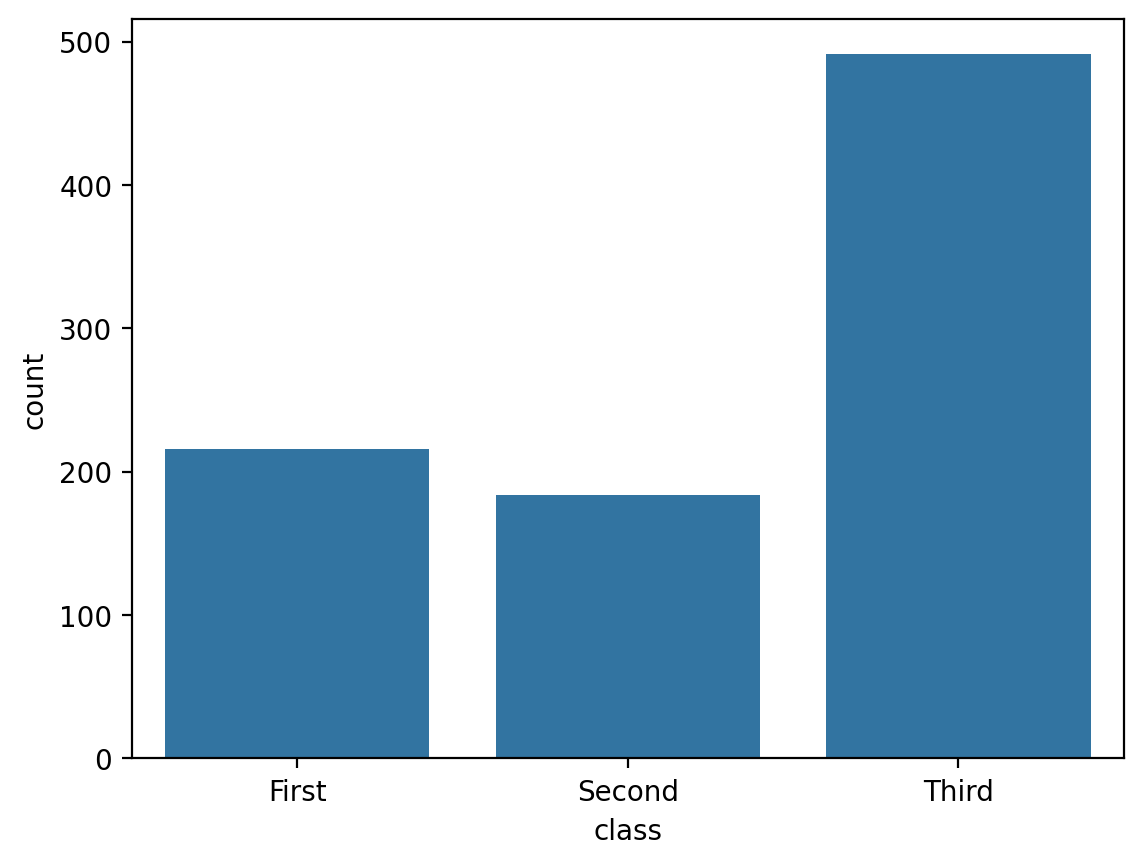

In [68]:
sns.countplot(ttn, x = 'class');

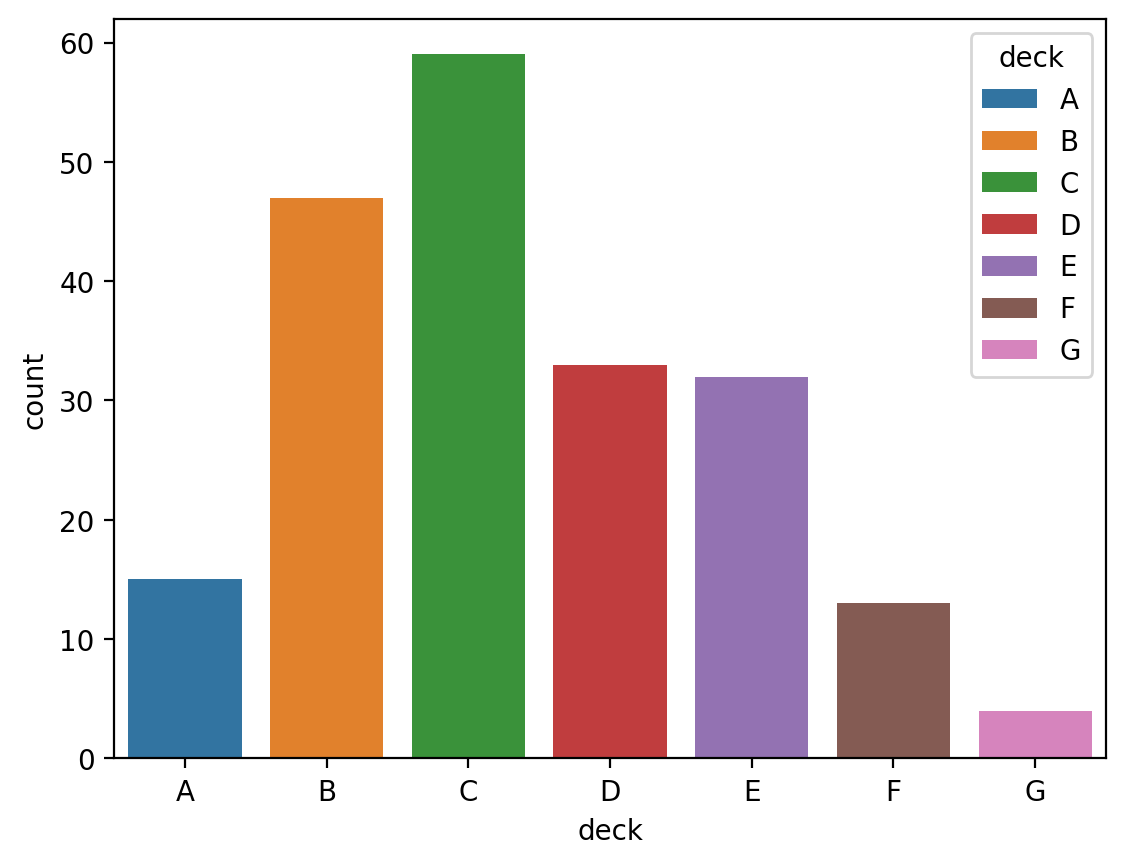

In [69]:
sns.countplot(ttn, x = 'deck', hue = 'deck');

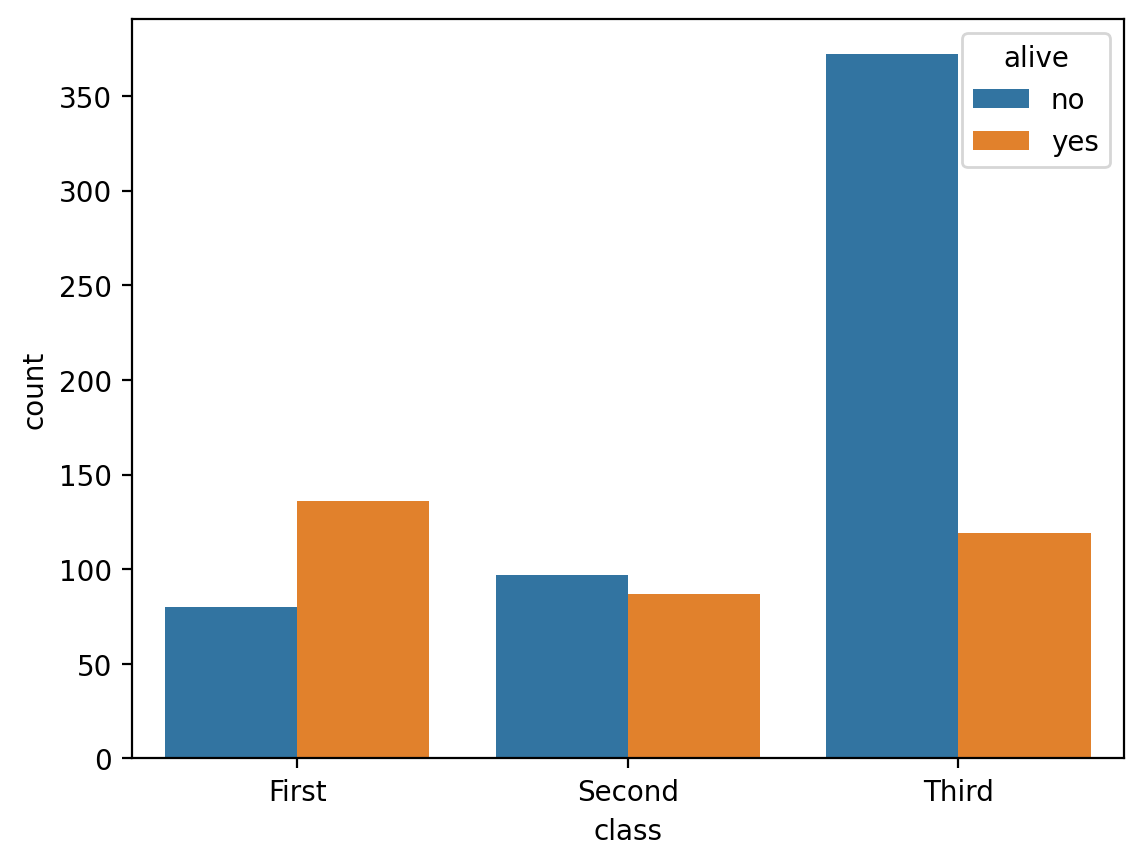

In [70]:
sns.countplot(ttn, x='class', hue='alive');

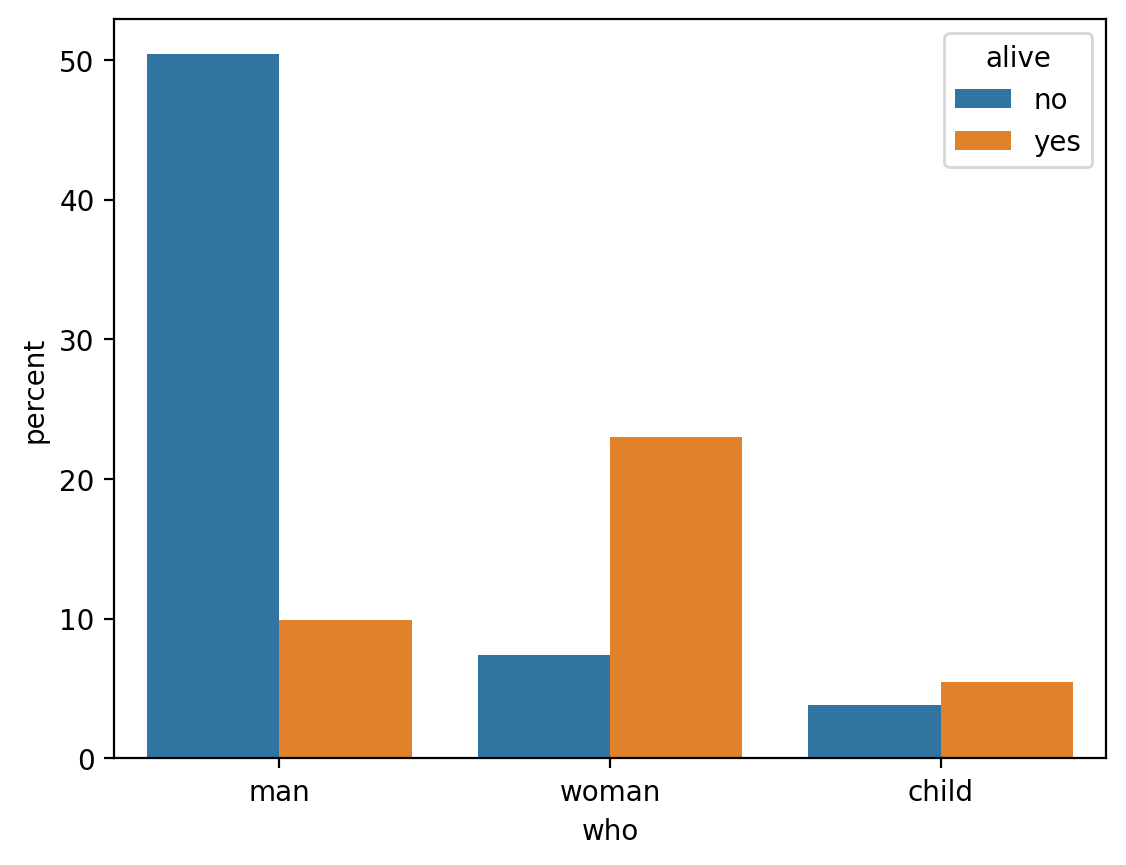

In [71]:
sns.countplot(ttn, x='who', hue='alive', stat = 'percent');

## 열 검사

In [72]:
ttn.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [73]:
ttn['pclass']

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [74]:
type(ttn['pclass'])

pandas.core.series.Series

In [75]:
ttn.pclass

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [76]:
ttn[['pclass']]

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [77]:
ttn[['pclass','alive']]

,pclass,alive
0,3,no
1,1,yes
2,3,yes
3,1,yes
4,3,no
...,...,...
886,2,no
887,1,yes
888,3,no
889,1,yes


In [78]:
ttn.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [79]:
ttn.pclass.unique()

array([3, 1, 2])

In [80]:
ttn.pclass.nunique()

3

In [81]:
ttn.nunique().sort_index()

,0
adult_male,2
age,88
alive,2
alone,2
class,3
deck,7
embark_town,3
embarked,3
fare,248
parch,7


In [82]:
ttn.pclass.value_counts().sort_values()

,count
pclass,
2,184
1,216
3,491


## 열 별 그룹화

In [83]:
ttn.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [84]:
ttn.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [85]:
ttn.groupby('embark_town').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [86]:
ttn.groupby('pclass')

In [87]:
ttn.groupby('pclass')['fare']

In [88]:
ttn.groupby('pclass')['fare'].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


In [89]:
ttn.groupby('embark_town')['fare'].mean()

,fare
embark_town,
Cherbourg,59.954144
Queenstown,13.276030
Southampton,27.079812


## 막대그래프

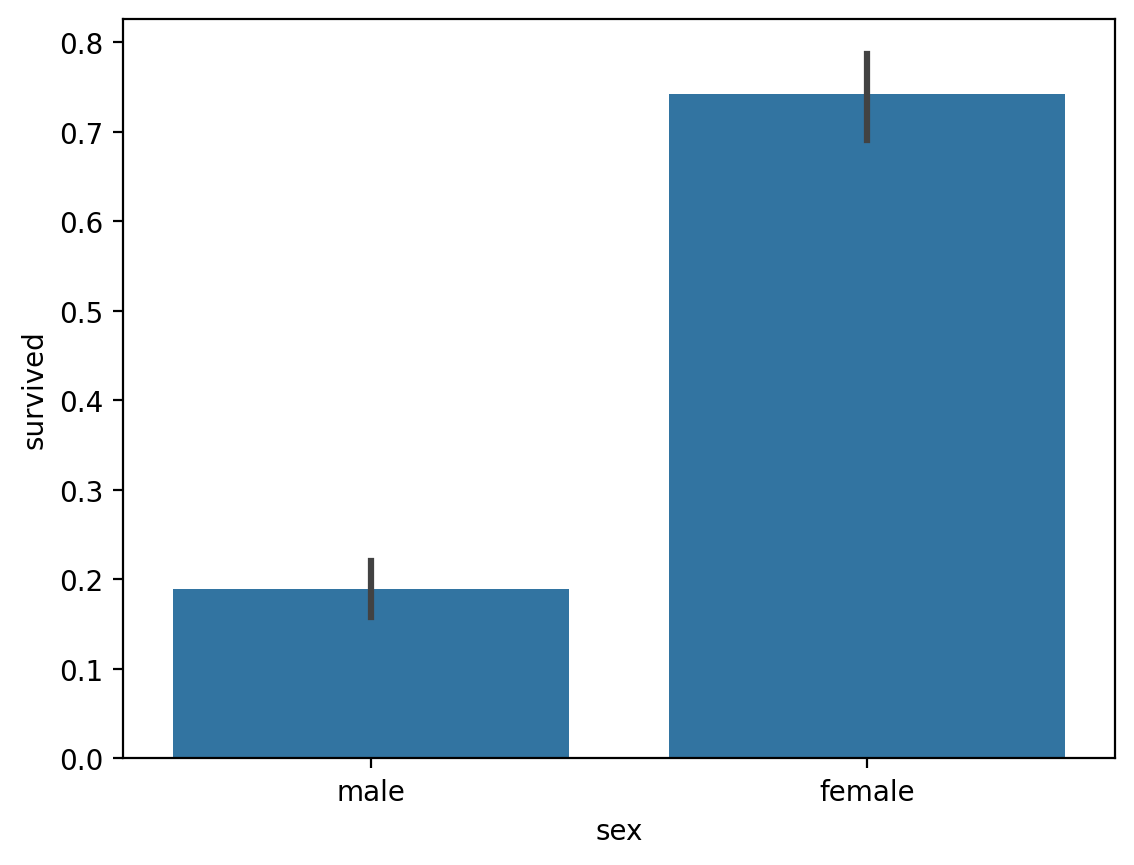

In [90]:
sns.barplot(ttn, x = 'sex', y = 'survived');

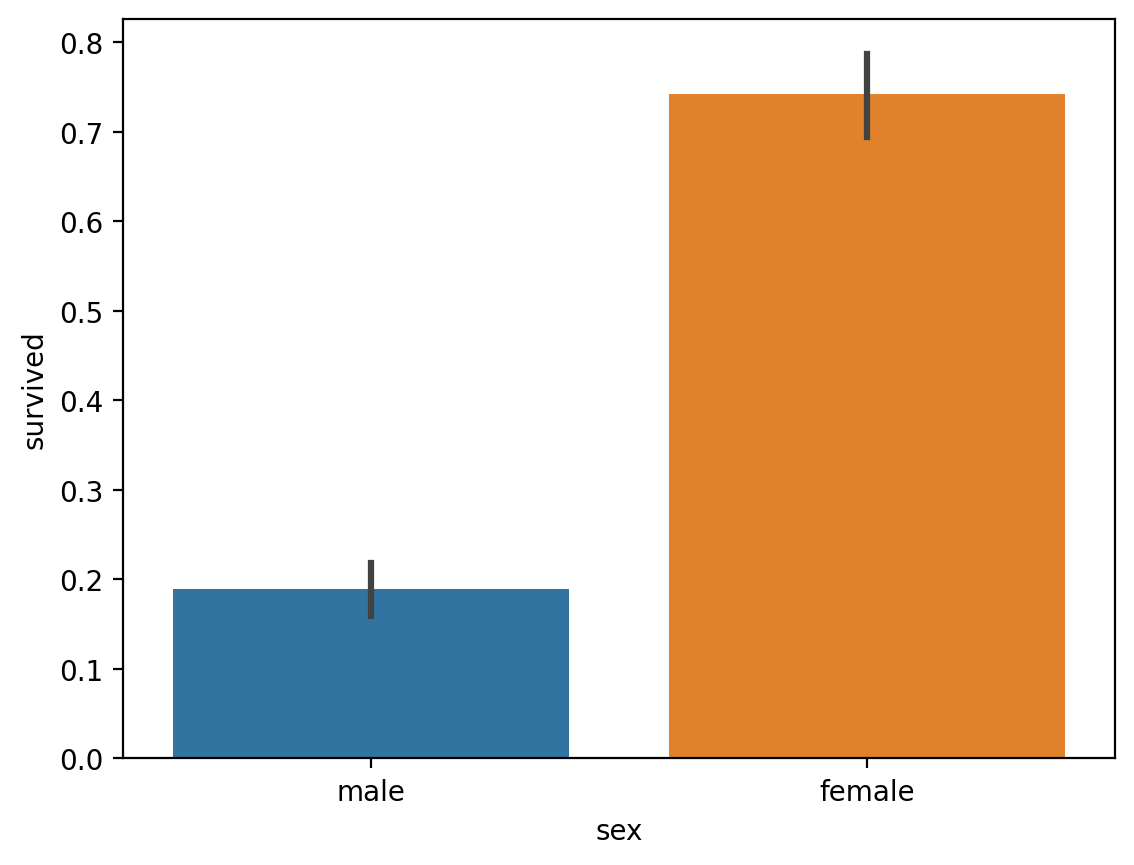

In [91]:
sns.barplot(ttn, x = 'sex', y = 'survived', hue = 'sex');

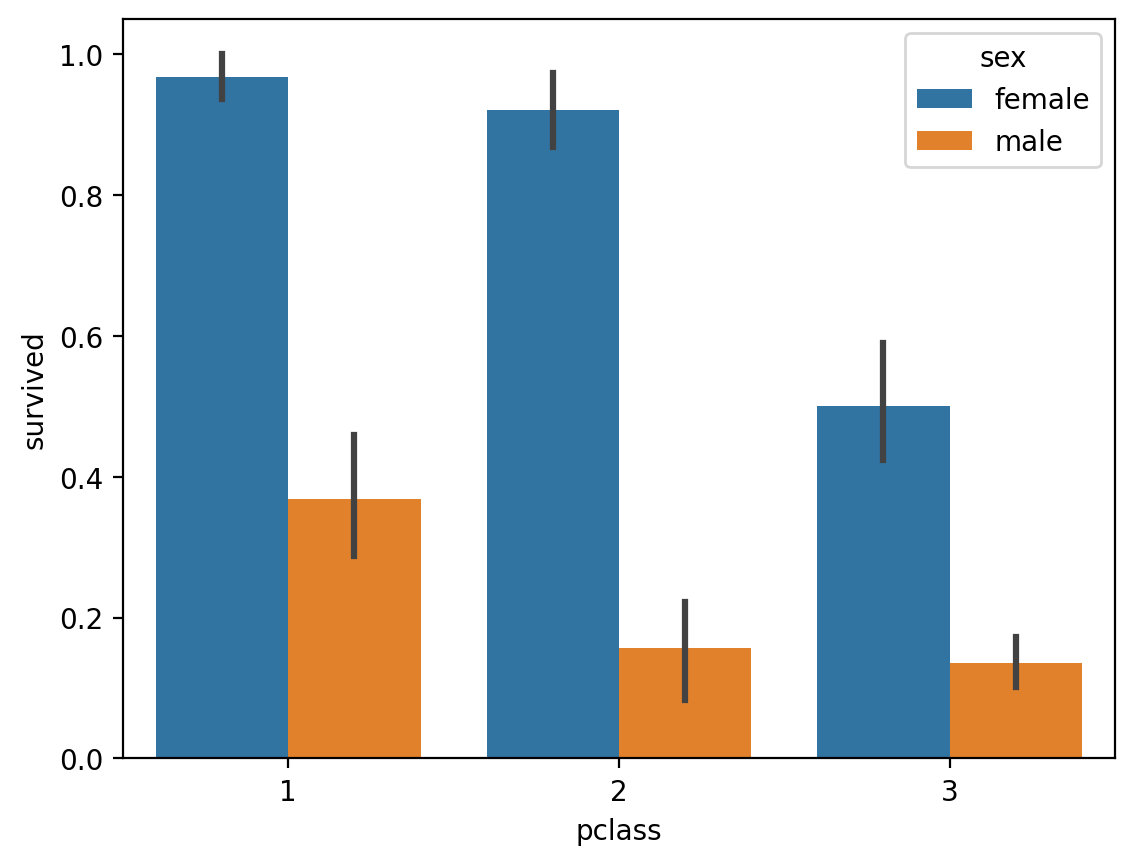

In [92]:
sns.barplot(ttn, x = 'pclass', y = 'survived', hue = 'sex');

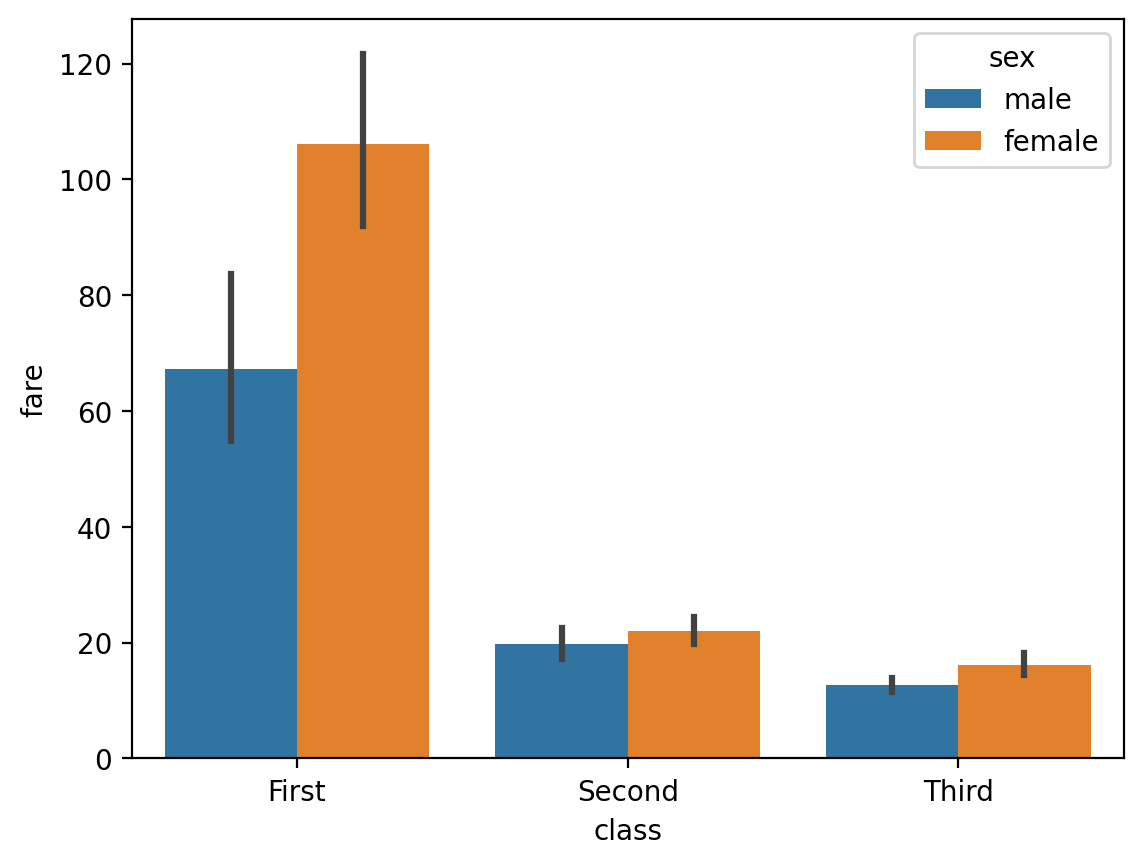

In [93]:
sns.barplot(ttn, x = 'class', y = 'fare', hue = 'sex');

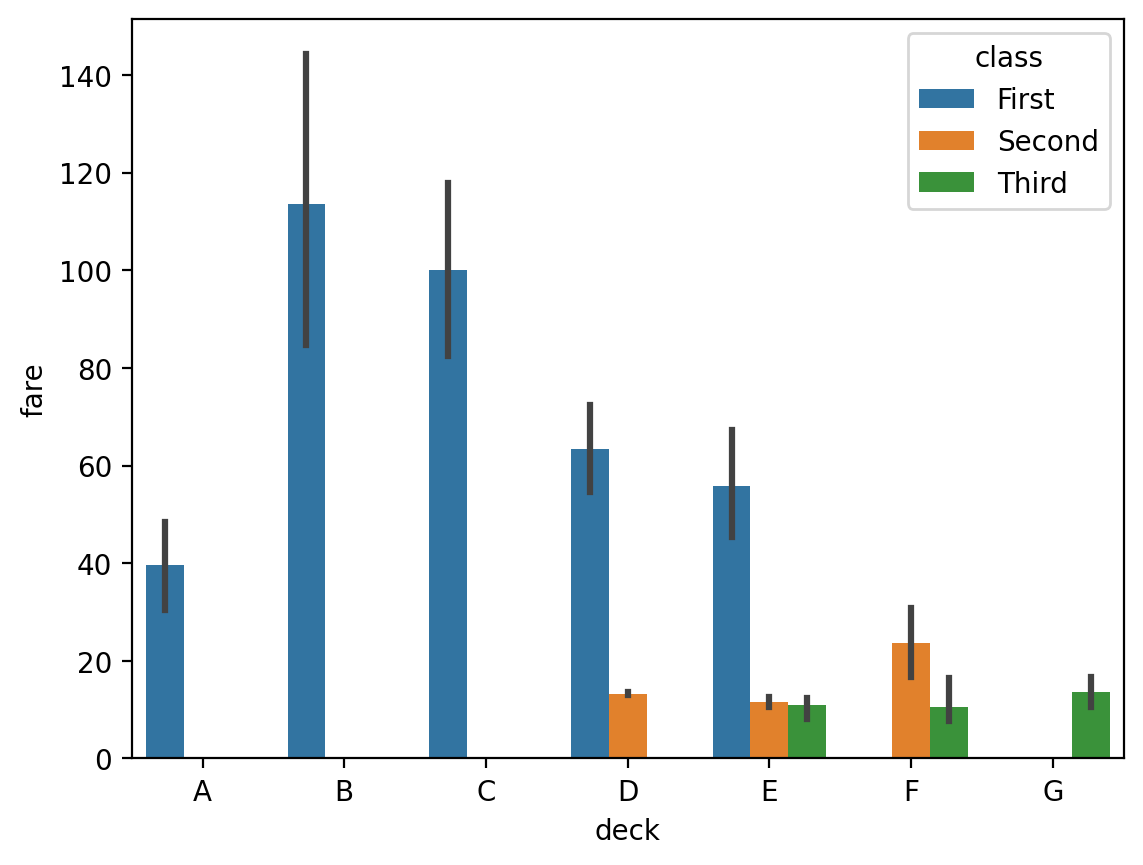

In [94]:
sns.barplot(ttn, x = 'deck', y = 'fare', hue = 'class');

## 단원 04

In [95]:
import pandas as pd

In [97]:
df = pd.DataFrame({"name" :["김지훈", "이유진", "박종현", "김민지"],
                   "english":[90,80,60,70],
                   "math":[50,60,100,20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [98]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [99]:
df.describe(include='all')

,name,english,math
count,4,4.000000,4.000000
unique,4,NaN,NaN
top,김지훈,NaN,NaN
freq,1,NaN,NaN
mean,NaN,75.000000,57.500000
std,NaN,12.909944,33.040379
min,NaN,60.000000,20.000000
25%,NaN,67.500000,42.500000
50%,NaN,75.000000,55.000000
75%,NaN,82.500000,70.000000


In [100]:
df['math']

,math
0,50
1,60
2,100
3,20


In [101]:
sum(df['math'])

230

In [103]:
sum(df['english'])

300

In [105]:
df['math'].sum()

np.int64(230)

In [106]:
df['english'].sum()

np.int64(300)

In [107]:
df['english'].mean()

np.float64(75.0)

In [108]:
sum(df['english'] / len(df))

75.0

In [110]:
df.shape

(4, 3)

In [111]:
sum(df['english']) / df.shape[0]

75.0

In [113]:
df.english.mean()

np.float64(75.0)

In [115]:
df.math.mean()

np.float64(57.5)

In [116]:
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박종현,60,100
3,김민지,70,20


In [117]:
df.sum()

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [122]:
df.sum(axis=0, numeric_only=True)

,0
english,300
math,230


In [118]:
df.sum(axis=0)

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [119]:
df.sum(axis='index')

,0
name,김지훈이유진박종현김민지
english,300
math,230


In [121]:
df.sum(axis=1, numeric_only=True)

,0
0,140
1,140
2,160
3,90


In [124]:
df.sum(axis='columns', numeric_only=True)

,0
0,140
1,140
2,160
3,90


In [125]:
## 외부 데이터 활용

In [126]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [127]:
exam = pd.read_excel('data/excel_exam.xlsx')

In [128]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [129]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [130]:
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


In [131]:
exam.english.mean()

np.float64(84.9)

In [134]:
exam.english.max()

98

In [138]:
exam_novar = pd.read_excel('data/excel_exam_novar.xlsx')
exam_novar

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [139]:
exam_novar = pd.read_excel('data/excel_exam_novar.xlsx', header=None)
exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


In [140]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name='Sheet2')
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,100


In [141]:
exam = pd.read_excel('data/excel_exam.xlsx', sheet_name=1)
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,100


In [143]:
df = pd.read_csv(('data/exam.csv'))
df.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [149]:
df.to_csv('output.csv')

In [150]:
df.to_csv('output_index_false.csv', index = False)

## 자기주도 학습

In [152]:
mydf = pd.DataFrame({'제품': ['사과', '딸기', '수박'],
                     '가격': [1800, 1500, 3000],
                     '판매량': [24, 38, 13]})
mydf

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


## 정리하기
<div>
  <input type='text' style='width = 100px'>
  <input type='submit' value='확인'>

</div>



In [ ]:
# 데이터프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})

In [153]:
mydf.sum(axis = 0, numeric_only=True)

,0
가격,6300
판매량,75


In [157]:
mydf.mean(axis = 0, numeric_only=True)

,0
가격,2100.0
판매량,25.0


In [158]:
mydf.sum(axis = 1, numeric_only=True)

,0
0,1824
1,1538
2,3013


In [159]:
mydf.mean(axis = 1, numeric_only=True)

,0
0,912.0
1,769.0
2,1506.5


## 정리하기

In [160]:
#데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})

## 단원 05

In [161]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.head(7)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


In [162]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [163]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
167,subaru,impreza awd,2.5,1999,4,manual(m5),4,19,26,r,subcompact
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
48,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
47,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan


In [164]:
mpg.sample(8)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
167,subaru,impreza awd,2.5,1999,4,manual(m5),4,19,26,r,subcompact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
158,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv


In [165]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [166]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


In [167]:
mpg[['category']]

,category
0,compact
1,compact
2,compact
3,compact
4,compact
...,...
229,midsize
230,midsize
231,midsize
232,midsize


In [168]:
mpg[['category']].describe()

,category
count,234
unique,7
top,suv
freq,62


In [169]:
mpg[['category', 'manufacturer','fl','drv']].describe()

,category,manufacturer,fl,drv
count,234,234,234,234
unique,7,15,5,3
top,suv,dodge,r,f
freq,62,37,168,106


In [172]:
mpg.fl.unique()

array(['p', 'r', 'e', 'd', 'c'], dtype=object)

In [174]:
mpg.fl.values

array(['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'r', 'e', 'r', 'r', 'r', 'p', 'p', 'p',
       'p', 'p', 'r', 'e', 'r', 'd', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'e', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'e', 'r', 'r', 'r', 'r', 'e', 'r', 'r', 'r', 'r', 'r',
       'e', 'r', 'r', 'r', 'e', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'p', 'r', 'r', 'r', 'p', 'r',
       'r', 'r', 'c', 'p', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'd', 'r', 'r', 'r', 'e', 'r', 'r', 'p',
       'p', 'r', 'r', 'p', 'r', 'p', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'p', 'p', 'r', 'r', 'p', 'r', 'r', 'p', 'p', 'r', 'p',
       'r', 'r', 'p', 'r', 'r', 'r', 'p', 'r', 'p', 'r', 'r', 'r', 'r',
       'p', 'r', 'p', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r

In [179]:
mpg.fl.value_counts().sort_values(ascending=False)

,count
fl,
r,168
p,52
e,8
d,5
c,1


In [180]:
mpg['category'].value_counts()

,count
category,
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


In [181]:
mpg[['fl','category']].value_counts().to_frame()

count
fl category         
r  suv            48
   pickup         30
   subcompact     29
   midsize        26
   compact        25
p  compact        21
   midsize        15
r  minivan        10
p  suv             8
   2seater         5
e  suv             4
   pickup          3
p  subcompact      3
d  subcompact      2
   suv             2
c  subcompact      1
d  compact         1
e  minivan         1

In [182]:
df = mpg[['fl','category']].value_counts().to_frame()
df.index

MultiIndex([('r',        'suv'),
            ('r',     'pickup'),
            ('r', 'subcompact'),
            ('r',    'midsize'),
            ('r',    'compact'),
            ('p',    'compact'),
            ('p',    'midsize'),
            ('r',    'minivan'),
            ('p',        'suv'),
            ('p',    '2seater'),
            ('e',        'suv'),
            ('e',     'pickup'),
            ('p', 'subcompact'),
            ('d', 'subcompact'),
            ('d',        'suv'),
            ('c', 'subcompact'),
            ('d',    'compact'),
            ('e',    'minivan')],
           names=['fl', 'category'])

## 함수와 메소드 차이

In [185]:
sum([1,2]) #함수

3

In [186]:
df = pd.DataFrame({'X' : [10,20,30]})
df.head(2) #메소드, 소속 된 객체나 클래스


,X
0,10
1,20


In [206]:
df_raw = pd.DataFrame({'var1' : [1, 2, 1],
                       'var2' : [2, 3, 2],
                       'var3' : [10, 20, 30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [207]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [208]:
id(df_new)

138623812593168

In [209]:
id(df)

138623812172240

In [210]:
df_new.rename(columns = {'var2' : 'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [211]:
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [212]:
df_new.rename(columns = {'var2' : 'v2'}, inplace = True)

In [213]:
df_new

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [217]:
df_new.rename(index = {0 : 'x', 1 : 'y', 2 : 'z'}, inplace=True)
df_new

,var1,v2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [228]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={'A': 'aa', 'B': 'cc'}, inplace = True)

df

,aa,cc
0,1,4
1,2,5
2,3,6


## 종료